<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/content/dam/news/images/noticies/2016/202-nova-marca-uoc.jpg" align="left" width="45%">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Trabajo de Fin de Máster</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Machine Learning para predecir cancelaciones y mejorar la retención en seguros

## Modelo resultante

In [1]:
import pandas as pd
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv').squeeze()
X_train_smote = pd.read_csv('X_train_smote.csv')
y_train_smote = pd.read_csv('y_train_smote.csv').squeeze()

In [2]:
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Diccionario con los mejores hiperparámetros
mejores_hiperparametros_rf = {
    'max_depth': 20,
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'n_estimators': 300
}

# Crear el modelo Random Forest con los mejores hiperparámetros
rf_smote = RandomForestClassifier(**mejores_hiperparametros_rf)

# Ajustar el modelo con los datos de SMOTE
rf_smote.fit(X_train_smote, y_train_smote)

# Predicciones sobre el conjunto de prueba
y_pred_smote = rf_smote.predict(X_test)
y_proba_smote = rf_smote.predict_proba(X_test)[:, 1]

# Evaluación
print("\nResultados para SMOTE (Random Forest) con Hypertuning:")
print(f"Mejores hiperparámetros: {mejores_hiperparametros_rf}")
print(f"AUC: {roc_auc_score(y_test, y_proba_smote):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_smote):.4f}")


Resultados para SMOTE (Random Forest) con Hypertuning:
Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
AUC: 0.6937
F1-score: 0.4532


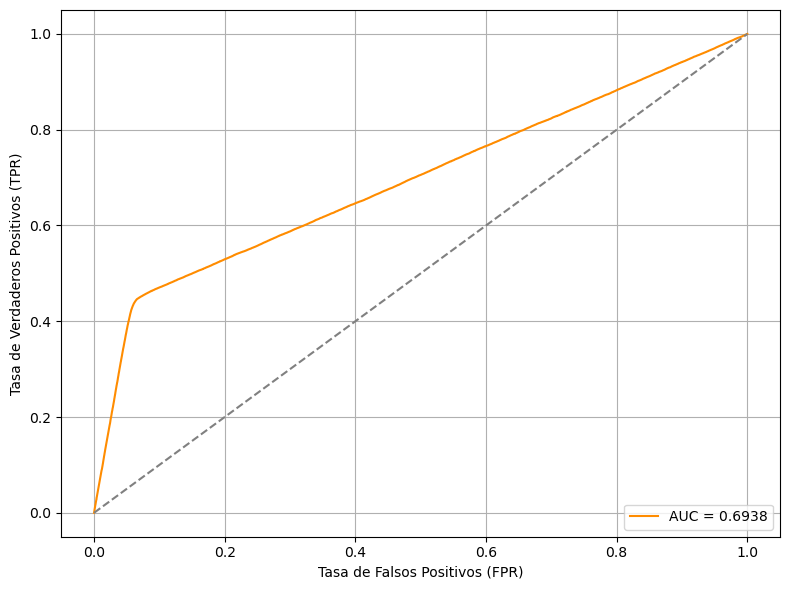

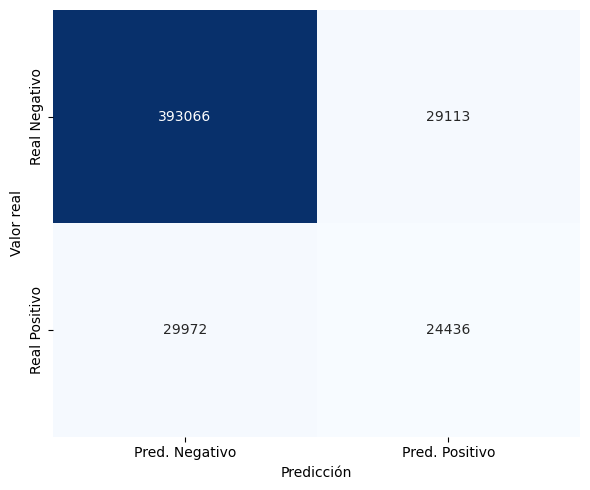

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9292    0.9310    0.9301    422179
           1     0.4563    0.4491    0.4527     54408

    accuracy                         0.8760    476587
   macro avg     0.6927    0.6901    0.6914    476587
weighted avg     0.8752    0.8760    0.8756    476587



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix, classification_report

fpr, tpr, thresholds = roc_curve(y_test, y_proba_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba_smote):.4f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

matriz = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(6, 5))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred. Negativo', 'Pred. Positivo'],
            yticklabels=['Real Negativo', 'Real Positivo'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.tight_layout()
plt.show()

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_smote, digits=4))


In [ ]:
import shap
explainer = shap.TreeExplainer(rf_smote)
sample = X_test.sample(500, random_state=42)
shap_values = explainer.shap_values(sample)

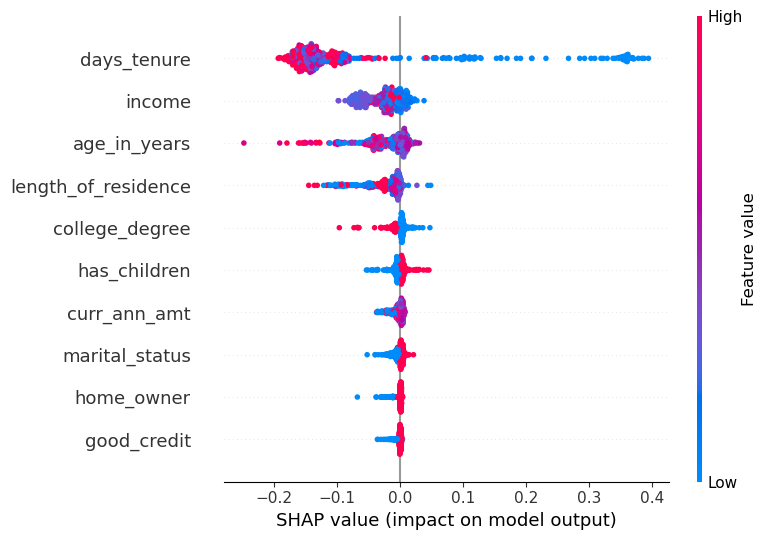

In [31]:
shap.summary_plot(shap_values[:, :, 1], sample, max_display=10)

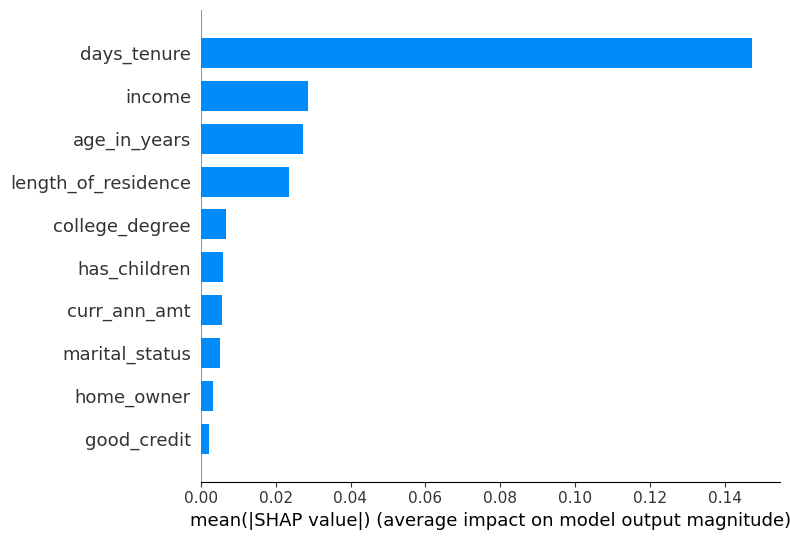

In [32]:
shap.summary_plot(shap_values[:, :, 1], sample, plot_type="bar", max_display=10)